In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 
import random
from citipy import citipy
from api_keys import (weather_api_key, gkey)

units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [2]:
# Generate Cities List
cities = []

# Generate random coordinates
lat = np.random.uniform(low = -90, high = 90, size=2000)
long = np.random.uniform(low = -180, high = 180, size=2000)
coordinates = list(zip(lat, long))

# For every set of coordinates:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


751


In [3]:
# Perform API calls

# for city in cities:
#     raw_data = requests.get(query_url + city).json()
    
# print(raw_data)


raw_data = requests.get(query_url + 'denver').json()

print(raw_data)

{'coord': {'lon': -104.9847, 'lat': 39.7392}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 88.81, 'feels_like': 87.42, 'temp_min': 82.53, 'temp_max': 93.81, 'pressure': 1011, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 118, 'gust': 8.99}, 'clouds': {'all': 15}, 'dt': 1627062620, 'sys': {'type': 2, 'id': 2004334, 'country': 'US', 'sunrise': 1627041065, 'sunset': 1627093286}, 'timezone': -21600, 'id': 5419384, 'name': 'Denver', 'cod': 200}


In [4]:
# Perform API calls

# Set initial count
Set = 1
rec_num = 0

# Lists to hold data
place_name = []
country = []
lon = []
lat = []
weather = []
temp = []
temp_max = []
temp_min = []
humidity = []
cloudiness = []
wind_speed = []


# for city in the cities list
for city in cities:
    
    # try to get weather data
    try:
        raw_data = requests.get(query_url + city).json()
        
        place_name.append(raw_data['name'])
        country.append(raw_data['sys']['country'])
        lon.append(raw_data['coord']['lon'])
        lat.append(raw_data['coord']['lat'])
        weather.append(raw_data['weather'][0]['description'])
        temp.append(raw_data['main']['temp'])
        temp_max.append(raw_data['main']['temp_max'])
        temp_min.append(raw_data['main']['temp_min'])
        humidity.append(raw_data['main']['humidity'])
        cloudiness.append(raw_data['clouds']['all'])
        wind_speed.append(raw_data['wind']['speed'])
        
        
        # Add one to the record number
        rec_num += 1
        
        # If the number you get is more than 50
        if rec_num > 50:
            
            # Start over counting from 1
            rec_num = 1
            
            # add one to the set
            Set += 1
            
        print(f"Processing Record {rec_num} of Set {Set} | {raw_data['name']}")
        
    except:
        print('City not found. Skipping...')

Processing Record 1 of Set 1 | Airai
Processing Record 2 of Set 1 | Camaçari
Processing Record 3 of Set 1 | Talcahuano
Processing Record 4 of Set 1 | Rikitea
Processing Record 5 of Set 1 | Nanortalik
Processing Record 6 of Set 1 | Vestmannaeyjar
Processing Record 7 of Set 1 | Saint-Pierre
Processing Record 8 of Set 1 | Venice of the Philippines
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | Qaanaaq
Processing Record 11 of Set 1 | Vostok
City not found. Skipping...
Processing Record 12 of Set 1 | Yellowknife
Processing Record 13 of Set 1 | Narsaq
Processing Record 14 of Set 1 | Khani
Processing Record 15 of Set 1 | New Norfolk
Processing Record 16 of Set 1 | Mataura
Processing Record 17 of Set 1 | Faya
Processing Record 18 of Set 1 | Poum
Processing Record 19 of Set 1 | Cidreira
Processing Record 20 of Set 1 | Vila Franca do Campo
Processing Record 21 of Set 1 | Makkah al Mukarramah
Processing Record 22 of Set 1 | Imeni Poliny Osipenko
Processing Record 23 of Set

In [5]:
# Create DataFrame

weather_data = {"City": place_name, 
              "Country": country, 
              "Longitude": lon, 
              "Latitude": lat, 
              "Weather": weather,
              "Temp": temp,
              "Temp (Max)": temp_max,
              "Temp (Min)": temp_min,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed
0,Airai,TL,125.4092,-8.9266,clear sky,55.38,55.38,55.38,46,7,3.27
1,Camaçari,BR,-38.3242,-12.6975,broken clouds,73.17,73.17,73.17,86,73,12.10
2,Talcahuano,CL,-73.1167,-36.7167,clear sky,56.88,56.88,56.88,67,0,13.80
3,Rikitea,PF,-134.9692,-23.1203,broken clouds,71.67,71.67,71.67,74,73,17.87
4,Nanortalik,GL,-45.2371,60.1432,broken clouds,43.90,43.90,43.90,83,52,14.67
...,...,...,...,...,...,...,...,...,...,...,...
681,Cockburn Town,TC,-71.1419,21.4612,scattered clouds,87.76,87.76,87.76,66,40,16.11
682,Buchanan,LR,-10.0467,5.8808,light rain,78.76,78.76,78.76,81,100,9.80
683,Togur,RU,82.8265,58.3631,clear sky,63.61,63.61,63.61,74,0,4.59
684,Marigot,MF,-63.0833,18.0667,scattered clouds,85.86,86.09,85.05,71,40,16.11


In [6]:
# find cities with humidity over 100
weather_df[weather_df["Humidity"]>100]


,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed


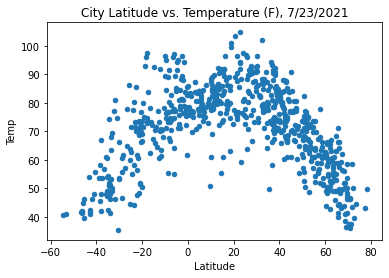

In [7]:
# Latitude vs. Temperature Plot
weather_df.plot.scatter("Latitude", "Temp")
plt.title('City Latitude vs. Temperature (F), 7/23/2021')
plt.savefig('citylat_vs_temp.png')

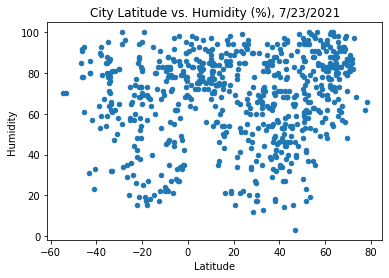

In [12]:
# Latitude vs. Humidity Plot
weather_df.plot.scatter("Latitude", "Humidity")
plt.title('City Latitude vs. Humidity (%), 7/23/2021')
plt.savefig('citylat_vs_humidity.png')

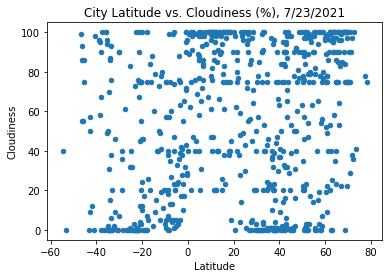

In [13]:
# Latitude vs. Cloudiness Plot
weather_df.plot.scatter("Latitude", "Cloudiness")
plt.title('City Latitude vs. Cloudiness (%), 7/23/2021')
plt.savefig('citylat_vs_cloud.png')

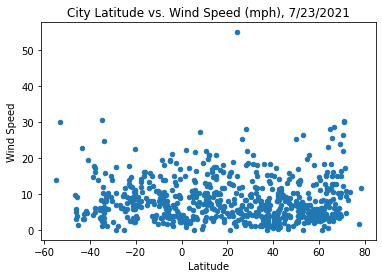

In [14]:
# Latitude vs. Wind Speed Plot
weather_df.plot.scatter("Latitude", "Wind Speed")
plt.title('City Latitude vs. Wind Speed (mph), 7/23/2021')
plt.savefig('citylat_vs_wind.png')

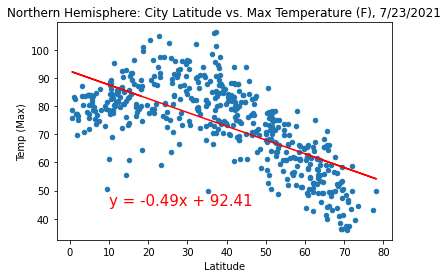

In [16]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
NH_df = weather_df[(weather_df['Latitude'] >= 0)]
NH_df.plot.scatter("Latitude", "Temp (Max)")
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (F), 7/23/2021')

n_latitude = NH_df.iloc[:, 3]
max_t = NH_df.iloc[:, 6]

slope, intercept, rvalues, pvalues, std_err = st.linregress(n_latitude, max_t)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude, regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

plt.savefig('nh_citylat_vs_maxtemp.png')

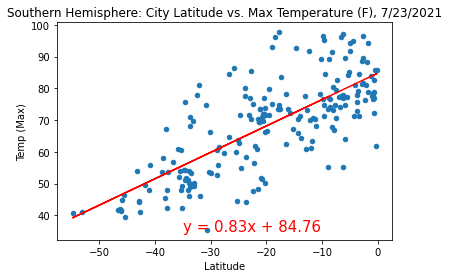

In [17]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
SH_df = weather_df[(weather_df['Latitude'] < 0)]
SH_df.plot.scatter("Latitude", "Temp (Max)")
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (F), 7/23/2021')

s_latitude = SH_df.iloc[:, 3]
max_t = SH_df.iloc[:, 6]

slope, intercept, rvalues, pvalues, std_err = st.linregress(s_latitude, max_t)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude, regress_values,"r-")
plt.annotate(line_eq,(-35,35),fontsize=15,color="red")

plt.savefig('sh_citylat_vs_maxtemp.png')

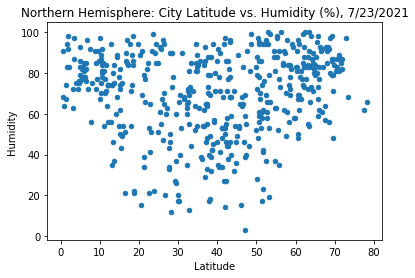

In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Humidity")
plt.title('Northern Hemisphere: City Latitude vs. Humidity (%), 7/23/2021')

plt.savefig('nh_citylat_vs_humidity.png')

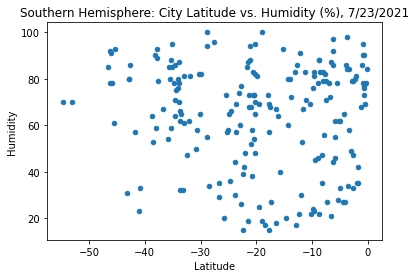

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Humidity")
plt.title('Southern Hemisphere: City Latitude vs. Humidity (%), 7/23/2021')

plt.savefig('sh_citylat_vs_humidity.png')

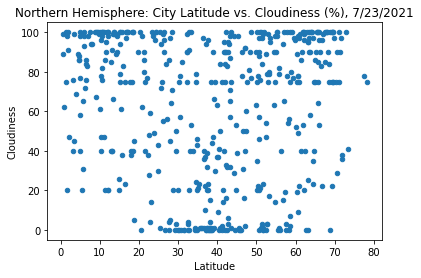

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Cloudiness")
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (%), 7/23/2021')

plt.savefig('nh_citylat_vs_cloud.png')

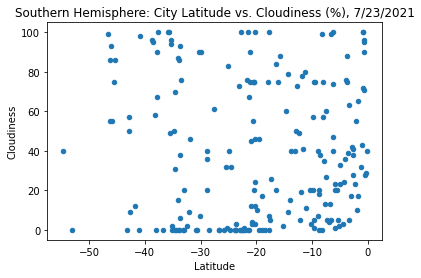

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Cloudiness")
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%), 7/23/2021')

plt.savefig('sh_citylat_vs_cloud.png')

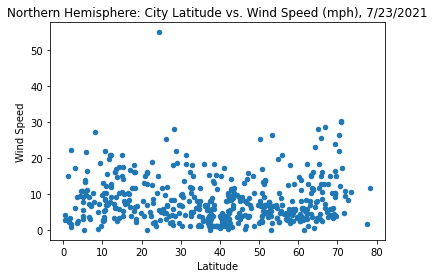

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Wind Speed")
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (mph), 7/23/2021')

plt.savefig('nh_citylat_vs_wind.png')

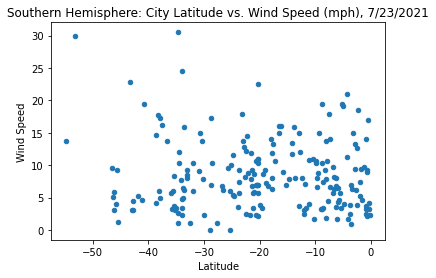

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Wind Speed")
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (mph), 7/23/2021')

plt.savefig('sh_citylat_vs_wind.png')

In [65]:
weather_df.to_csv('../output_data/city_weather_data.csv')